In [98]:
import pandas as pd
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('whitegrid')

In [99]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

labelencoder_X=LabelEncoder()
train['Gender']=labelencoder_X.fit_transform(train['Gender'])
oneHotEncoder=OneHotEncoder(categorical_features=['Gender']) 

labelencoder_X=LabelEncoder()
test['Gender']=labelencoder_X.fit_transform(test['Gender'])
oneHotEncoder=OneHotEncoder(categorical_features=['Gender']) 
train.head()
test.head()
train.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.029741,0.017007,0.004349,0.112266,-0.066935,0.005839,-0.202705,-0.281515,-0.221264,-0.136606
Gender,0.029741,1.000000,0.108102,0.118208,-0.044595,0.090474,0.086366,-0.140011,-0.139308,-0.015578,-0.045860
Total_Bilirubin,0.017007,0.108102,1.000000,0.866070,0.153458,0.202096,0.227747,0.006593,-0.211662,-0.188128,-0.216970
Direct_Bilirubin,0.004349,0.118208,0.866070,1.000000,0.186806,0.235821,0.260630,0.023680,-0.213277,-0.173758,-0.243594
Alkaline_Phosphotase,0.112266,-0.044595,0.153458,0.186806,1.000000,0.100744,0.151079,-0.023904,-0.165888,-0.239228,-0.187186
Alamine_Aminotransferase,-0.066935,0.090474,0.202096,0.235821,0.100744,1.000000,0.784251,-0.033468,-0.010968,0.015321,-0.156944
Aspartate_Aminotransferase,0.005839,0.086366,0.227747,0.260630,0.151079,0.784251,1.000000,-0.016300,-0.075667,-0.059750,-0.148021
Total_Protiens,-0.202705,-0.140011,0.006593,0.023680,-0.023904,-0.033468,-0.016300,1.000000,0.773420,0.215055,0.048957
Albumin,-0.281515,-0.139308,-0.211662,-0.213277,-0.165888,-0.010968,-0.075667,0.773420,1.000000,0.673159,0.182147
Albumin_and_Globulin_Ratio,-0.221264,-0.015578,-0.188128,-0.173758,-0.239228,0.015321,-0.059750,0.215055,0.673159,1.000000,0.172084


In [71]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']] = scaler.fit_transform(train[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']])

In [100]:
train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
mean,45.321888,0.774678,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,0.418243,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,1.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [101]:
q=train.groupby('Dataset')
q['Albumin_and_Globulin_Ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
Dataset,,,,,,,,
1,331.0,0.917885,0.342427,0.30,0.7,0.9,1.1,2.8
2,132.0,1.044924,0.292555,0.37,0.9,1.0,1.2,1.9


# using decision tree

In [102]:
feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']
x=train[feature_cols]
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
0,60,1,6.3,3.2,314,118,114
1,31,0,0.8,0.2,158,21,16
2,60,1,19.6,9.5,466,46,52
3,34,1,8.7,4.0,298,58,138
4,26,0,0.9,0.2,154,16,12


In [103]:
y=train['Dataset']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)

In [147]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [148]:
metrics.accuracy_score(y_pred, y_test)

0.723404255319149

# using random forest

In [109]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']
x=train[feature_cols]
# x.info()

y=train['Dataset']
# y.head()

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.2,random_state=1)

In [114]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier( n_estimators=600,criterion="entropy")
# Train the model on training data
rf=rf.fit(x_train,y_train)

In [115]:
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7340425531914894

# using SVC

In [116]:
from sklearn.svm import SVC

In [143]:
cf=SVC(kernel='rbf',random_state=1)
cf.fit(x_train,y_train)
y_pred=cf.predict(x_test)
metrics.accuracy_score(y_pred,y_test)

0.7978723404255319

In [144]:
feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']
x1=train[feature_cols]

y1=train['Dataset']

cf=SVC(kernel='rbf',random_state=1)
cf.fit(x1,y1)

feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase']
x2=test[feature_cols]

y_pred=clf.predict(x2)
test["predict"]=y_pred
test['predict'].value_counts()

1    83
2    34
Name: predict, dtype: int64

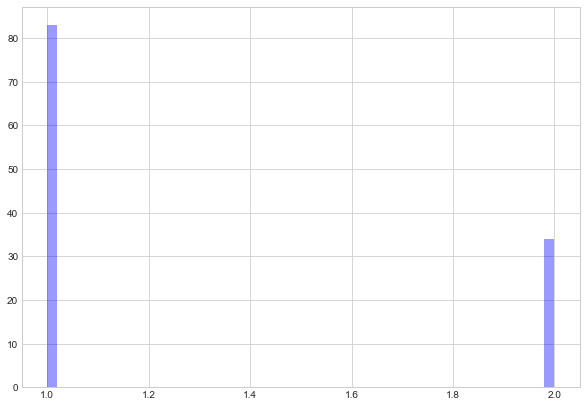

In [146]:
plt.figure(figsize=(10,7))
sns.distplot(y_pred, kde=False, bins=50, color='blue')

In [125]:
export_csv = test.to_csv (r'C:\Users\Ravneet\Desktop\Data Analysis and Visualisation\Assignment 2\problem_1\AnswerProblem1.csv', index = None, header=True)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Ravneet\\Desktop\\Data Analysis and Visualisation\\Assignment 2\\problem_1\\AnswerProblem1.csv'